# Two-Layer Fully Connected Network
Normal Unmodified Dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the FC-500-150 model for MNIST
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model for 10 epochs
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1877 - accuracy: 0.9427 - val_loss: 0.1047 - val_accuracy: 0.9658
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0795 - accuracy: 0.9755 - val_loss: 0.0837 - val_accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.0845 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0412 - accuracy: 0.9863 - val_loss: 0.0813 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0702 - val_accuracy: 0.9789
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0921 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0221 - accuracy: 0.9923 - val_loss: 0.0908 -

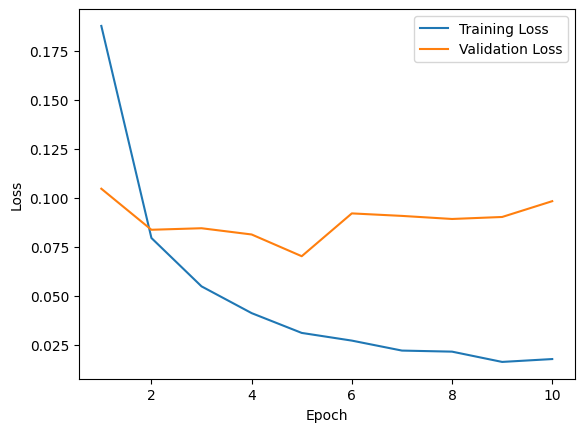

In [2]:
# Plot the loss
plt.plot(range(1,11),history.history['loss'], label='Training Loss')
plt.plot(range(1,11),history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [3]:
model.save("../Models/Mnist/mnist_model_2LFCN_V2.karas")

INFO:tensorflow:Assets written to: ../Models/Mnist/mnist_model_2LFCN_V2.karas\assets


INFO:tensorflow:Assets written to: ../Models/Mnist/mnist_model_2LFCN_V2.karas\assets


# Two-Layer LeNet Convolutional Neural Network:
Normal Unmodified Dataset

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data and reshape for convolutional layers
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Build the LeNet-5 model for MNIST
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model for 10 epochs
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1919 - accuracy: 0.9415 - val_loss: 0.0749 - val_accuracy: 0.9765
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0656 - accuracy: 0.9795 - val_loss: 0.0513 - val_accuracy: 0.9822
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0478 - accuracy: 0.9852 - val_loss: 0.0402 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0384 - accuracy: 0.9881 - val_loss: 0.0392 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0394 - val_accuracy: 0.9873
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0451 - val_accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0346 -

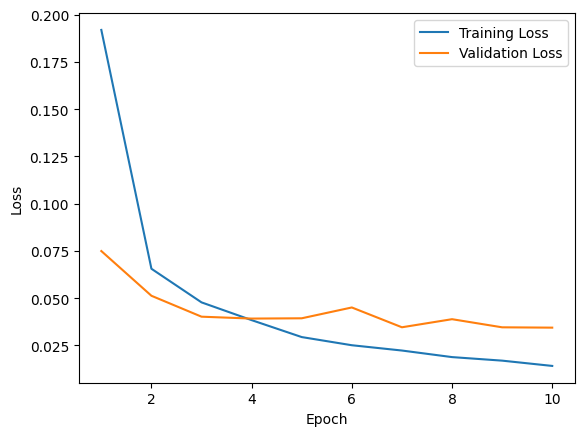

In [5]:
# Plot the loss
plt.plot(range(1,11),history.history['loss'], label='Training Loss')
plt.plot(range(1,11),history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Save the model
model.save("../Models/Mnist/mnist_model_LENET_V2.karas")

INFO:tensorflow:Assets written to: ../Models/Mnist/mnist_model_LENET_V2.karas\assets


INFO:tensorflow:Assets written to: ../Models/Mnist/mnist_model_LENET_V2.karas\assets


# Load and test each model

In [9]:
import tensorflow as tf
# Load the fully connected model
fully_connected_model = tf.keras.models.load_model("../Models/MNIST/mnist_model_2LFCN_V2.karas")
# Load the MNIST test dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0
# Evaluate the accuracy of the fully connected model
fully_connected_loss, fully_connected_accuracy = fully_connected_model.evaluate(test_images, test_labels)
print(f"Fully Connected Model - Test Accuracy: {fully_connected_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0983 - accuracy: 0.9812
Fully Connected Model - Test Accuracy: 98.12%


In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the LeNet model
lenet_model = tf.keras.models.load_model("../Models/MNIST/mnist_model_LENET_V2.karas")
# Load the MNIST test dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
# Evaluate the accuracy of the LeNet model
lenet_loss, lenet_accuracy = lenet_model.evaluate(test_images, test_labels)
print(f"LeNet Model - Test Accuracy: {lenet_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.0344 - accuracy: 0.9902
LeNet Model - Test Accuracy: 99.02%
